<a href="https://colab.research.google.com/github/alathiya/Bike-Sharing-Pattern/blob/main/project_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

     |████████████████████████████████| 819 kB 7.5 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.2.0
    Uninstalling setuptools-57.2.0:
      Successfully uninstalled setuptools-57.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


     |████████████████████████████████| 46.9 MB 39 kB/s 
     |████████████████████████████████| 8.6 MB 26.9 MB/s 
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080040 sha256=e759e95a7de96c5303ae3b7360fbd7ea9fa1b2dc97ff789282b86d3fd11b6173
  Stored in directory: /root/.cache/pip/wheels/9f/9e/ac/f24f30e119df73511fde9af8aa747217ac8824e662037ba9a8
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.3.3
    Uninstalling bokeh-2.3.3:
      Successfully uninstalled bokeh-2.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 0.11.3 requires bokeh<2.4.0,>=2.3.0, but you have bokeh 2.0.1 which is incompatible.
     |████████████████████

### Setup Kaggle API Key

In [3]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "alathiya"
kaggle_key = "ed7e146cbc308a331148fd61456d6883"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [5]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/316k [00:00<?, ?B/s]
100% 316k/316k [00:00<00:00, 46.3MB/s]
  0% 0.00/140k [00:00<?, ?B/s]
100% 140k/140k [00:00<00:00, 46.3MB/s]
  0% 0.00/633k [00:00<?, ?B/s]
100% 633k/633k [00:00<00:00, 90.2MB/s]
unzip:  cannot find or open bike-sharing-demand.zip, bike-sharing-demand.zip.zip or bike-sharing-demand.zip.ZIP.


In [6]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [7]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv', parse_dates = ['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv', parse_dates = ['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [10]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

In [11]:
eval_metric = 'root_mean_squared_error' 
X_train = train.drop(['casual','registered'], axis = 1)
y_train = train['count']

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [13]:
predictor = TabularPredictor(label='count', eval_metric=eval_metric).fit(X_train, presets='best_quality', time_limit=600)

No path specified. Models will be saved in: "AutogluonModels/ag-20210719_184945/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20210719_184945/"
AutoGluon Version:  0.2.0
Train Data Rows:    10886
Train Data Columns: 9
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
NumExpr defaulting to 2 threads.
	Available Memory:                    12700.97 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of available memory)
	Inferring data type 

[1000]	train_set's rmse: 123.806	valid_set's rmse: 134.369
[2000]	train_set's rmse: 117.412	valid_set's rmse: 133.705
[1000]	train_set's rmse: 123.42	valid_set's rmse: 141.5
[1000]	train_set's rmse: 125.097	valid_set's rmse: 128.797
[2000]	train_set's rmse: 119.003	valid_set's rmse: 127.909
[3000]	train_set's rmse: 114.63	valid_set's rmse: 127.431
[4000]	train_set's rmse: 111.295	valid_set's rmse: 126.943
[5000]	train_set's rmse: 108.576	valid_set's rmse: 126.844
[6000]	train_set's rmse: 106.085	valid_set's rmse: 126.71
[1000]	train_set's rmse: 124.131	valid_set's rmse: 138.303
[2000]	train_set's rmse: 117.833	valid_set's rmse: 137.535
[1000]	train_set's rmse: 124.871	valid_set's rmse: 128.052
[2000]	train_set's rmse: 118.547	valid_set's rmse: 127.003
[3000]	train_set's rmse: 114.124	valid_set's rmse: 126.834
[4000]	train_set's rmse: 110.645	valid_set's rmse: 126.694
[1000]	train_set's rmse: 124.654	valid_set's rmse: 135.095
[2000]	train_set's rmse: 118.764	valid_set's rmse: 133.849
[3

	-134.0883	 = Validation root_mean_squared_error score
	39.54s	 = Training runtime
	2.26s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 352.52s of the 552.55s of remaining time.


[1000]	train_set's rmse: 96.0217	valid_set's rmse: 123.249
[1000]	train_set's rmse: 94.7479	valid_set's rmse: 135.635
[1000]	train_set's rmse: 95.3055	valid_set's rmse: 132.087
[1000]	train_set's rmse: 95.1635	valid_set's rmse: 131.521


	-132.2864	 = Validation root_mean_squared_error score
	10.87s	 = Training runtime
	0.49s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 339.81s of the 539.84s of remaining time.
	-118.4567	 = Validation root_mean_squared_error score
	7.25s	 = Training runtime
	0.4s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 331.48s of the 531.51s of remaining time.
	-132.3497	 = Validation root_mean_squared_error score
	54.87s	 = Training runtime
	0.04s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 276.49s of the 476.52s of remaining time.
	-128.7334	 = Validation root_mean_squared_error score
	3.22s	 = Training runtime
	0.4s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ... Training model for up to 272.29s of the 472.32s of remaining time.
	Ran out of time, stopping training early.
	-138.16	 = Validation root_mean_squared_error score
	115.9s	 = Training runtime
	0.3s

[1000]	train_set's rmse: 76.682	valid_set's rmse: 96.8515


	-101.7503	 = Validation root_mean_squared_error score
	11.55s	 = Training runtime
	0.33s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ... Training model for up to 176.6s of the 176.6s of remaining time.
	-102.3429	 = Validation root_mean_squared_error score
	7.43s	 = Training runtime
	0.1s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 168.88s of the 168.87s of remaining time.
	-104.1509	 = Validation root_mean_squared_error score
	27.88s	 = Training runtime
	0.54s	 = Validation runtime
Fitting model: CatBoost_BAG_L2 ... Training model for up to 139.83s of the 139.82s of remaining time.
	-102.4136	 = Validation root_mean_squared_error score
	34.72s	 = Training runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L2 ... Training model for up to 105.04s of the 105.03s of remaining time.
	-103.3434	 = Validation root_mean_squared_error score
	6.54s	 = Training runtime
	0.49s	 = Validation runtime
Fitting model: NeuralNetF

### Review AutoGluon's training run with ranking of models that did the best.

In [14]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3 -100.325747       5.782448  518.852632                0.001333           1.050865            3       True         20
1   NeuralNetFastAI_BAG_L2 -100.871223       4.819276  470.950288                0.324601          90.183110            2       True         18
2        LightGBMXT_BAG_L2 -101.750347       4.821261  392.314818                0.326586          11.547641            2       True         13
3          LightGBM_BAG_L2 -102.342907       4.593768  388.194958                0.099093           7.427780            2       True         14
4          CatBoost_BAG_L2 -102.413630       4.515238  415.485002                0.020563          34.717824            2       True         16
5     ExtraTreesMSE_BAG_L2 -103.343434       4.988796  387.311656         

{'leaderboard':                      model   score_val  ...  can_infer  fit_order
 0      WeightedEnsemble_L3 -100.325747  ...       True         20
 1   NeuralNetFastAI_BAG_L2 -100.871223  ...       True         18
 2        LightGBMXT_BAG_L2 -101.750347  ...       True         13
 3          LightGBM_BAG_L2 -102.342907  ...       True         14
 4          CatBoost_BAG_L2 -102.413630  ...       True         16
 5     ExtraTreesMSE_BAG_L2 -103.343434  ...       True         17
 6   RandomForestMSE_BAG_L2 -104.150900  ...       True         15
 7      WeightedEnsemble_L2 -107.455128  ...       True         10
 8           XGBoost_BAG_L2 -107.519114  ...       True         19
 9           XGBoost_BAG_L1 -108.201588  ...       True          9
 10   KNeighborsDist_BAG_L2 -112.151915  ...       True         12
 11   KNeighborsUnif_BAG_L2 -112.277086  ...       True         11
 12  RandomForestMSE_BAG_L1 -118.456660  ...       True          5
 13    ExtraTreesMSE_BAG_L1 -128.733445  ...   

### Create predictions from test dataset

In [15]:
predictions = predictor.predict(test)
predictions.head()

0    68.650810
1    63.933750
2    63.934788
3    80.549614
4    80.524841
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [16]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      180.899918
std       126.766953
min       -31.567959
25%        79.132217
50%       153.428970
75%       262.786774
max       686.940491
Name: count, dtype: float64

In [17]:
# How many negative values do we have?
count = 0
for row in predictions:
    if row < 0:
        count=count+1
        
print(count)        

24


In [18]:
# Set them to zero
for i, row in enumerate(predictions):
    if row < 0:
            predictions[i] = row * -1
        
predictions.describe()       

count    6493.000000
mean      180.986298
std       126.643471
min         0.194309
25%        79.132217
50%       153.428970
75%       262.786774
max       686.940491
Name: count, dtype: float64

### Set predictions to submission dataframe, save, and submit

In [19]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [20]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 615kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [21]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv               2021-07-19 19:16:51  first raw submission  complete  1.34880      1.34880       
submission_new_features.csv  2021-07-15 01:43:24  new features          complete  0.44653      0.44653       
submission.csv               2021-07-12 23:24:26  first raw submission  complete  1.36204      1.36204       


#### Initial score of `1.36204`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f451b733a90>,
      dtype=object)

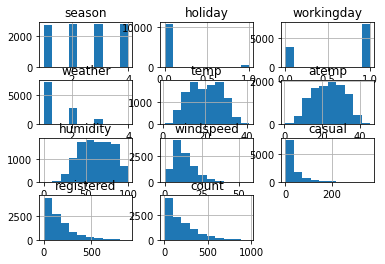

In [22]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [12]:
# create a new feature
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['weekday'] = train['datetime'].dt.weekday


test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['weekday'] = test['datetime'].dt.weekday

train = train.drop('datetime', axis = 1)
train = train.drop(['casual','registered'], axis = 1)
test = test.drop('datetime', axis = 1)

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [13]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [14]:
# View are new feature
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69bbbd8e90>,
      dtype=object)

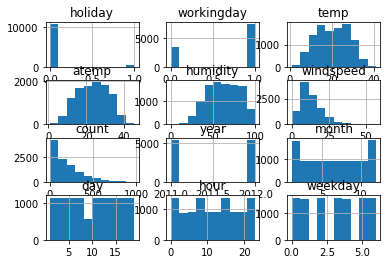

In [15]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [16]:
predictor_new_features = TabularPredictor(label='count', eval_metric=eval_metric).fit(train, presets='best_quality', time_limit=600)

No path specified. Models will be saved in: "AutogluonModels/ag-20210719_203919/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20210719_203919/"
AutoGluon Version:  0.2.0
Train Data Rows:    10886
Train Data Columns: 13
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12697.7 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of available memory)
	Inferring data type of each feature based on column v

[1000]	train_set's rmse: 45.5444	valid_set's rmse: 56.4784
[2000]	train_set's rmse: 37.0315	valid_set's rmse: 51.5302
[3000]	train_set's rmse: 32.0625	valid_set's rmse: 49.205
[4000]	train_set's rmse: 28.8208	valid_set's rmse: 48.104
[5000]	train_set's rmse: 26.4348	valid_set's rmse: 47.438
[6000]	train_set's rmse: 24.4342	valid_set's rmse: 46.9969
[7000]	train_set's rmse: 22.7785	valid_set's rmse: 46.7122
[8000]	train_set's rmse: 21.372	valid_set's rmse: 46.4372
[9000]	train_set's rmse: 20.1718	valid_set's rmse: 46.3246
[10000]	train_set's rmse: 19.0751	valid_set's rmse: 46.1492
[1000]	train_set's rmse: 45.8553	valid_set's rmse: 60.1311
[2000]	train_set's rmse: 37.127	valid_set's rmse: 54.4429
[3000]	train_set's rmse: 32.3178	valid_set's rmse: 51.9301
[4000]	train_set's rmse: 29.0672	valid_set's rmse: 50.5923
[5000]	train_set's rmse: 26.629	valid_set's rmse: 49.7932
[6000]	train_set's rmse: 24.6257	valid_set's rmse: 49.1691
[7000]	train_set's rmse: 22.9434	valid_set's rmse: 48.731
[80

	-47.3604	 = Validation root_mean_squared_error score
	113.07s	 = Training runtime
	7.59s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 261.78s of the 461.82s of remaining time.


[1000]	train_set's rmse: 19.8144	valid_set's rmse: 34.5176
[1000]	train_set's rmse: 19.846	valid_set's rmse: 34.427
[2000]	train_set's rmse: 14.3039	valid_set's rmse: 33.7285
[3000]	train_set's rmse: 11.2663	valid_set's rmse: 33.4853
[1000]	train_set's rmse: 19.8697	valid_set's rmse: 29.0867
[1000]	train_set's rmse: 19.766	valid_set's rmse: 36.3595
[2000]	train_set's rmse: 14.3417	valid_set's rmse: 35.4445
[3000]	train_set's rmse: 11.4008	valid_set's rmse: 35.0991
[4000]	train_set's rmse: 9.15962	valid_set's rmse: 34.9405
[5000]	train_set's rmse: 7.59445	valid_set's rmse: 34.8644
[6000]	train_set's rmse: 6.36802	valid_set's rmse: 34.8052
[1000]	train_set's rmse: 19.8315	valid_set's rmse: 36.0416
[2000]	train_set's rmse: 14.1709	valid_set's rmse: 35.4921
[1000]	train_set's rmse: 19.6911	valid_set's rmse: 36.9723
[2000]	train_set's rmse: 14.2916	valid_set's rmse: 36.4007
[1000]	train_set's rmse: 19.7018	valid_set's rmse: 32.2929
[1000]	train_set's rmse: 19.3621	valid_set's rmse: 33.113
[

	-34.1556	 = Validation root_mean_squared_error score
	27.34s	 = Training runtime
	1.42s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 229.49s of the 429.52s of remaining time.
	-38.9104	 = Validation root_mean_squared_error score
	8.95s	 = Training runtime
	0.43s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 219.41s of the 419.45s of remaining time.
	Time limit exceeded... Skipping CatBoost_BAG_L1.
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 174.23s of the 374.27s of remaining time.
	-38.6821	 = Validation root_mean_squared_error score
	3.83s	 = Training runtime
	0.41s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ... Training model for up to 169.43s of the 369.47s of remaining time.
	Ran out of time, stopping training early.
	Time limit exceeded... Skipping NeuralNetFastAI_BAG_L1.
Fitting model: XGBoost_BAG_L1 ... Training model for up to 151.64s of the 351.68s of remaini

In [17]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -32.637711      17.839742  449.007844                0.001199           0.951499            3       True         20
1   NeuralNetFastAI_BAG_L2  -32.773047      12.857998  390.679568                0.380399          89.919977            2       True         18
2      WeightedEnsemble_L2  -33.098974      10.149479  211.882243                0.001348           1.012954            2       True         10
3          CatBoost_BAG_L2  -33.189655      12.525691  344.383000                0.048092          43.623409            2       True         16
4          LightGBM_BAG_L2  -33.292665      12.580986  306.937542                0.103388           6.177951            2       True         14
5     ExtraTreesMSE_BAG_L2  -33.508640      12.963445  307.795568         

{'leaderboard':                      model   score_val  ...  can_infer  fit_order
 0      WeightedEnsemble_L3  -32.637711  ...       True         20
 1   NeuralNetFastAI_BAG_L2  -32.773047  ...       True         18
 2      WeightedEnsemble_L2  -33.098974  ...       True         10
 3          CatBoost_BAG_L2  -33.189655  ...       True         16
 4          LightGBM_BAG_L2  -33.292665  ...       True         14
 5     ExtraTreesMSE_BAG_L2  -33.508640  ...       True         17
 6        LightGBMXT_BAG_L2  -33.673686  ...       True         13
 7   RandomForestMSE_BAG_L2  -34.068913  ...       True         15
 8          LightGBM_BAG_L1  -34.155581  ...       True          4
 9           XGBoost_BAG_L1  -35.255211  ...       True          7
 10   KNeighborsDist_BAG_L2  -35.574282  ...       True         12
 11   KNeighborsUnif_BAG_L2  -35.575434  ...       True         11
 12    ExtraTreesMSE_BAG_L1  -38.682099  ...       True          6
 13  RandomForestMSE_BAG_L1  -38.910416  ...   

In [18]:
# Remember to set all negative values to zero

predictions = predictor_new_features.predict(test)
predictions.head()


0    21.786528
1     5.899507
2     4.712818
3     4.535108
4     4.625654
Name: count, dtype: float32

In [19]:
# How many negative values do we have?
count = 0
for row in predictions:
    if row < 0:
        count=count+1
        
print(count) 

5


In [20]:
# Set them to zero
for i, row in enumerate(predictions):
    if row < 0:
            predictions[i] = row * -1
        
predictions.describe()    

count    6493.000000
mean      188.276932
std       171.169952
min         0.066338
25%        46.770039
50%       146.970428
75%       276.312469
max       883.591675
Name: count, dtype: float64

In [21]:
# Same thing as train and test dataset
submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [25]:
# Same submitting predictions
submission_new_features["count"] = predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [26]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:01<00:00, 100kB/s]
Successfully submitted to Bike Sharing Demand

In [27]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2021-07-19 21:15:05  new features          complete  0.45386      0.45386       
submission.csv               2021-07-19 19:16:51  first raw submission  complete  1.34880      1.34880       
submission_new_features.csv  2021-07-15 01:43:24  new features          complete  0.44653      0.44653       


#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [32]:
import autogluon.core as ag
#import autogluon.tabular.TabularPrediction
#import TabularPrediction as task

num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto' 

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'layers': ag.space.Categorical([100], [1000], [200, 100], [300, 200, 100]),  # each choice for categorical hyperparameter 'layers' corresponds to list of sizes for each NN layer to use
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}


hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN': nn_options, 
                  } 

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}                  


predictor_new_hpo = TabularPredictor(label='count', eval_metric=eval_metric).fit(train, presets='best_quality', time_limit=600, hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)
#predictor_new_hpo = task.fit(train_data=train, label='count',
#                     time_limits=600, eval_metric=eval_metric, 
#                     hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs, 
#                     presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20210719_213239/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20210719_213239/"
AutoGluon Version:  0.2.0
Train Data Rows:    10886
Train Data Columns: 13
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11184.3 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of available memory)
	Inferring data type of each feature based on column v

Fitted model: LightGBM_BAG_L1/T0 ...
	-41.553	 = Validation root_mean_squared_error score
	0.32s	 = Training runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T1 ...
	-39.3542	 = Validation root_mean_squared_error score
	0.31s	 = Training runtime
	0.02s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	-88.7428	 = Validation root_mean_squared_error score
	0.35s	 = Training runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T3 ...
	-42.8682	 = Validation root_mean_squared_error score
	0.33s	 = Training runtime
	0.01s	 = Validation runtime


Fitted model: LightGBM_BAG_L1/T4 ...
	-36.98	 = Validation root_mean_squared_error score
	0.34s	 = Training runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: NeuralNetMXNet_BAG_L1 ...


	Time limit exceeded
Fitted model: NeuralNetMXNet_BAG_L1/T0 ...
	-110.5277	 = Validation root_mean_squared_error score
	8.97s	 = Training runtime
	0.05s	 = Validation runtime
Fitting model: LightGBM_BAG_L1/T0 ... Training model for up to 386.43s of the 586.47s of remaining time.


	-41.8529	 = Validation root_mean_squared_error score
	2.98s	 = Training runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L1/T1 ... Training model for up to 383.55s of the 583.59s of remaining time.
	-39.6103	 = Validation root_mean_squared_error score
	3.26s	 = Training runtime
	0.12s	 = Validation runtime
Fitting model: LightGBM_BAG_L1/T2 ... Training model for up to 380.33s of the 580.37s of remaining time.
	-89.6454	 = Validation root_mean_squared_error score
	3.28s	 = Training runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L1/T3 ... Training model for up to 377.13s of the 577.17s of remaining time.
	-43.2126	 = Validation root_mean_squared_error score
	3.09s	 = Training runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L1/T4 ... Training model for up to 374.12s of the 574.16s of remaining time.
	-37.0351	 = Validation root_mean_squared_error score
	3.18s	 = Training runtime
	0.12s	 = Validation runtime
Fitting model: NeuralNetMXNet_B

Fitted model: LightGBM_BAG_L2/T0 ...
	-37.8647	 = Validation root_mean_squared_error score
	0.33s	 = Training runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T1 ...
	-54.4295	 = Validation root_mean_squared_error score
	0.39s	 = Training runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	-37.5699	 = Validation root_mean_squared_error score
	0.32s	 = Training runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T3 ...
	-112.0108	 = Validation root_mean_squared_error score
	0.32s	 = Training runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T4 ...
	-37.5912	 = Validation root_mean_squared_error score
	0.38s	 = Training runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: NeuralNetMXNet_BAG_L2 ...


	Ran out of time, stopping training early. (Stopping on epoch 7)
	Time limit exceeded
Fitted model: NeuralNetMXNet_BAG_L2/T0 ...
	-48.5093	 = Validation root_mean_squared_error score
	7.26s	 = Training runtime
	0.05s	 = Validation runtime
Fitting model: LightGBM_BAG_L2/T0 ... Training model for up to 233.39s of the 233.38s of remaining time.


	-36.0152	 = Validation root_mean_squared_error score
	3.57s	 = Training runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L2/T1 ... Training model for up to 229.95s of the 229.94s of remaining time.
	-54.3201	 = Validation root_mean_squared_error score
	4.31s	 = Training runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L2/T2 ... Training model for up to 225.75s of the 225.74s of remaining time.
	-36.2036	 = Validation root_mean_squared_error score
	3.57s	 = Training runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L2/T3 ... Training model for up to 222.3s of the 222.3s of remaining time.
	-113.6559	 = Validation root_mean_squared_error score
	3.42s	 = Training runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L2/T4 ... Training model for up to 219.01s of the 219.0s of remaining time.
	-36.0251	 = Validation root_mean_squared_error score
	4.18s	 = Training runtime
	0.11s	 = Validation runtime
Fitting model: NeuralNetMXNet_BAG_L

In [33]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                       model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        WeightedEnsemble_L3  -35.770176      13.589649  501.605537                0.001124           0.629970            3       True         14
1         LightGBM_BAG_L2/T0  -35.858929       9.542175  345.662129                0.197442           7.004616            2       True          8
2         LightGBM_BAG_L2/T4  -35.900665       9.555377  346.797381                0.210644           8.139868            2       True         12
3         LightGBM_BAG_L2/T2  -36.011801       9.534569  345.597438                0.189836           6.939925            2       True         10
4         LightGBM_BAG_L1/T4  -36.440973       0.468672   13.030863                0.468672          13.030863            1       True          5
5        WeightedEnsemble_L2  -36.440973       0.469856   13.6

{'leaderboard':                        model   score_val  ...  can_infer  fit_order
 0        WeightedEnsemble_L3  -35.770176  ...       True         14
 1         LightGBM_BAG_L2/T0  -35.858929  ...       True          8
 2         LightGBM_BAG_L2/T4  -35.900665  ...       True         12
 3         LightGBM_BAG_L2/T2  -36.011801  ...       True         10
 4         LightGBM_BAG_L1/T4  -36.440973  ...       True          5
 5        WeightedEnsemble_L2  -36.440973  ...       True          7
 6         LightGBM_BAG_L1/T1  -39.098969  ...       True          2
 7         LightGBM_BAG_L1/T0  -41.472234  ...       True          1
 8         LightGBM_BAG_L1/T3  -42.719058  ...       True          4
 9   NeuralNetMXNet_BAG_L2/T0  -47.862588  ...       True         13
 10        LightGBM_BAG_L2/T1  -54.200784  ...       True          9
 11        LightGBM_BAG_L1/T2  -89.507264  ...       True          3
 12  NeuralNetMXNet_BAG_L1/T0 -107.905772  ...       True          6
 13        LightGBM

In [34]:
predictions = predictor_new_hpo.predict(test)
predictions.head()

0    11.592010
1     7.811765
2     7.809037
3     7.769621
4     7.767485
Name: count, dtype: float32

In [35]:
# Remember to set all negative values to zero
count = 0
for row in predictions:
    if row < 0:
        count=count+1
        
print(count)

0


In [36]:
for i, row in enumerate(predictions):
    if row < 0:
            predictions[i] = row * -1
        
predictions.describe()

count    6493.000000
mean      189.842697
std       173.140732
min         7.439333
25%        44.551117
50%       148.885574
75%       282.466644
max       880.766724
Name: count, dtype: float64

In [38]:
submission_new_hpo = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [39]:
# Same submitting predictions
submission_new_hpo["count"] = predictions
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [40]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:02<00:00, 69.5kB/s]
Successfully submitted to Bike Sharing Demand

In [41]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2021-07-19 22:01:47  new features with hyperparameters  complete  0.49144      0.49144       
submission_new_features.csv  2021-07-19 21:15:05  new features                       complete  0.45386      0.45386       
submission.csv               2021-07-19 19:16:51  first raw submission               complete  1.34880      1.34880       


#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

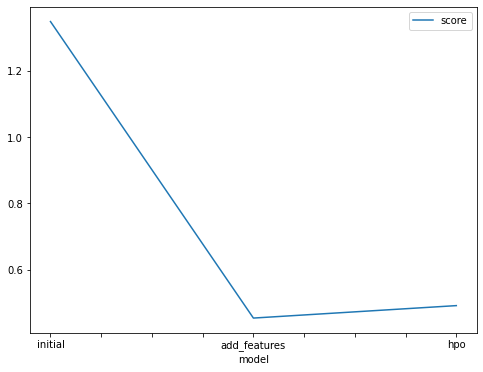

In [42]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [1.34880, 0.45386, 0.49144]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

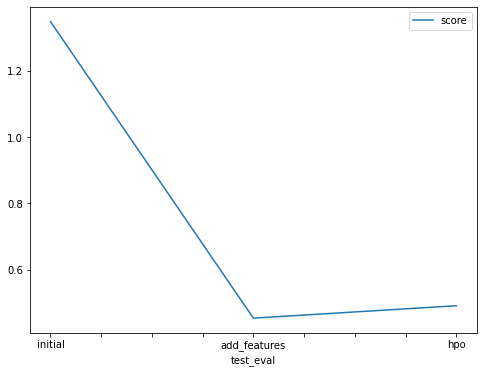

In [43]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.34880, 0.45386, 0.49144]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [47]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ['default', 'default', 'GBM, NN'],
    "hpo2": ['default', 'default', 'GBM, NN'],
    "hpo3": ['default', 'default', 'GBM, NN'],
    "score": [1.34880, 0.45386, 0.49144]
})

,model,hpo1,hpo2,hpo3,score
0,initial,default,default,default,1.34880
1,add_features,default,default,default,0.45386
2,hpo,"GBM, NN","GBM, NN","GBM, NN",0.49144
